In [20]:
import gzip
import math
import numpy as np
import random
import sklearn
import string
from collections import defaultdict
from sklearn import linear_model
import dateutil
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

plt.rcParams["figure.figsize"] = (10,10)

In [17]:
count = 10000
data = []
with open('endomondoHR_proper.json') as f:
    for i,l in enumerate(f):
        if i == count:
            break
        data.append(eval(l))

In [18]:
# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Feature engineering: Concatenate temporal features into a single array
df['temporal_features'] = df.apply(lambda row: np.concatenate([row['heart_rate'], row['longitude'], row['altitude'], row['latitude']]), axis=1)

# Drop unnecessary columns
df = df.drop(['heart_rate', 'longitude', 'altitude', 'latitude', 'speed', 'timestamp', 'url'], axis=1)

# Display the first few rows of the dataset
print(df.head())

# Split the data into training and testing sets
X = np.stack(df['temporal_features'].to_numpy())
y = df['sport']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple predictive model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

              sport         id gender    userId  \
0              bike  396826535   male  10921915   
1              bike  392337038   male  10921915   
2              bike  389643739   male  10921915   
3              bike  386729739   male  10921915   
4  bike (transport)  383186560   male  10921915   

                                   temporal_features  
0  [100.0, 111.0, 120.0, 119.0, 120.0, 116.0, 125...  
1  [100.0, 105.0, 111.0, 110.0, 108.0, 115.0, 126...  
2  [99.0, 105.0, 113.0, 110.0, 109.0, 110.0, 108....  
3  [99.0, 105.0, 113.0, 109.0, 112.0, 116.0, 116....  
4  [110.0, 113.0, 114.0, 116.0, 123.0, 126.0, 129...  
Accuracy: 0.9185

Classification Report:
                          precision    recall  f1-score   support

                   bike       0.94      0.93      0.93       825
       bike (transport)       0.93      0.93      0.93       212
core stability training       0.00      0.00      0.00         3
                 hiking       0.00      0.00      0.00      

d:\Anaconda\envs\pytorch_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\envs\pytorch_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\envs\pytorch_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# df = pd.DataFrame(data)

# # Feature engineering: Concatenate temporal features into a single array
# df['temporal_features'] = df.apply(lambda row: np.concatenate([row['heart_rate'], row['longitude'], row['altitude'], row['latitude'], row['speed']]), axis=1)

# # Drop unnecessary columns
# df = df.drop(['heart_rate', 'longitude', 'altitude', 'latitude', 'speed', 'timestamp', 'url'], axis=1)

# # Split the data into training and testing sets
# X = np.stack(df['temporal_features'].to_numpy())
# y = df['sport']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the SVM model
model = SVC(kernel='poly', random_state=42)  # You can experiment with different kernels
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7485

Classification Report:
                          precision    recall  f1-score   support

                   bike       0.86      0.64      0.73       825
       bike (transport)       0.92      0.84      0.88       212
core stability training       0.00      0.00      0.00         3
                 hiking       0.00      0.00      0.00         1
         indoor cycling       0.00      0.00      0.00         9
               kayaking       0.00      0.00      0.00         3
          mountain bike       0.81      0.14      0.23        96
           orienteering       0.00      0.00      0.00        39
                 rowing       0.00      0.00      0.00         3
                    run       0.66      0.96      0.78       808
      treadmill running       0.00      0.00      0.00         1

               accuracy                           0.75      2000
              macro avg       0.30      0.23      0.24      2000
           weighted avg       0.76      0.75  

d:\Anaconda\envs\pytorch_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\envs\pytorch_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\envs\pytorch_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
print(data[0].keys())

dict_keys(['longitude', 'altitude', 'latitude', 'sport', 'id', 'heart_rate', 'gender', 'timestamp', 'url', 'userId', 'speed'])


In [4]:
df = pd.DataFrame(data)

In [5]:
print(df.head())

                                           longitude  \
0  [24.64977040886879, 24.65014273300767, 24.6509...   
1  [24.649855233728886, 24.65015547350049, 24.650...   
2  [24.64995657093823, 24.650197718292475, 24.651...   
3  [24.649874344468117, 24.650242729112506, 24.65...   
4  [24.64979832060635, 24.64992195367813, 24.6500...   

                                            altitude  \
0  [41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....   
1  [38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....   
2  [76.4, 73.2, 72.4, 73.0, 73.0, 70.8, 69.2, 69....   
3  [28.6, 29.4, 29.4, 29.4, 28.0, 27.0, 25.2, 23....   
4  [32.0, 32.0, 32.0, 35.8, 36.2, 36.2, 36.2, 36....   

                                            latitude             sport  \
0  [60.173348765820265, 60.173239801079035, 60.17...              bike   
1  [60.173247596248984, 60.17320962622762, 60.172...              bike   
2  [60.17326201312244, 60.173205351457, 60.172969...              bike   
3  [60.173286236822605, 60.173

In [6]:
print(df.describe())

                 id        userId
count  1.000000e+03  1.000000e+03
mean   3.089157e+08  4.377069e+06
std    1.374520e+08  2.989004e+06
min    3.930381e+06  2.793170e+05
25%    2.229239e+08  3.905196e+06
50%    3.229402e+08  4.007546e+06
75%    4.071605e+08  4.969375e+06
max    6.505012e+08  1.188931e+07


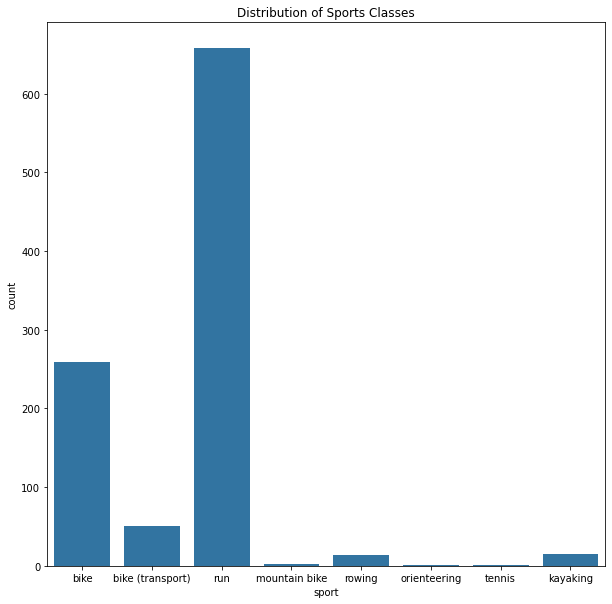

In [7]:
sns.countplot(x='sport', data=df)
plt.title('Distribution of Sports Classes')
plt.show()

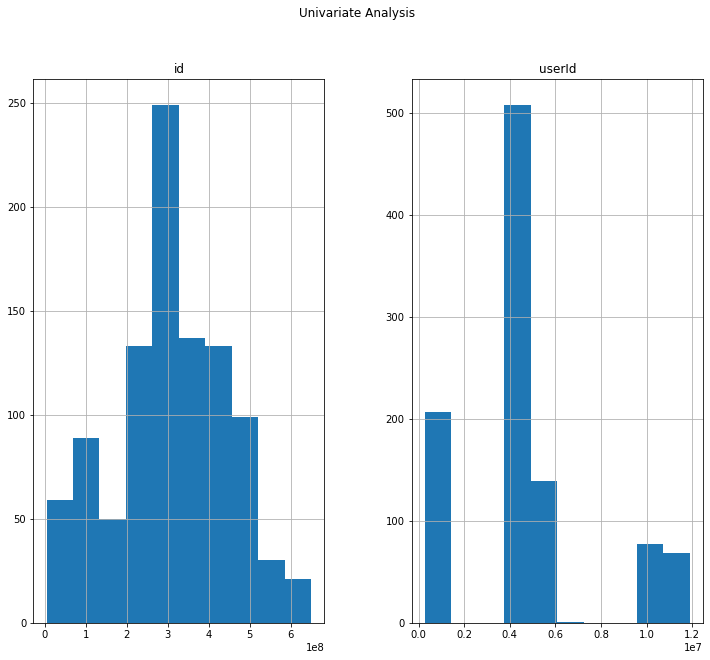

In [8]:
df.hist(figsize=(12, 10))
plt.suptitle('Univariate Analysis')
plt.show()

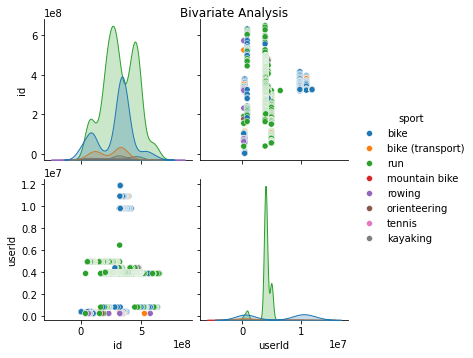

In [9]:
sns.pairplot(df, hue='sport')
plt.suptitle('Bivariate Analysis')
plt.show()

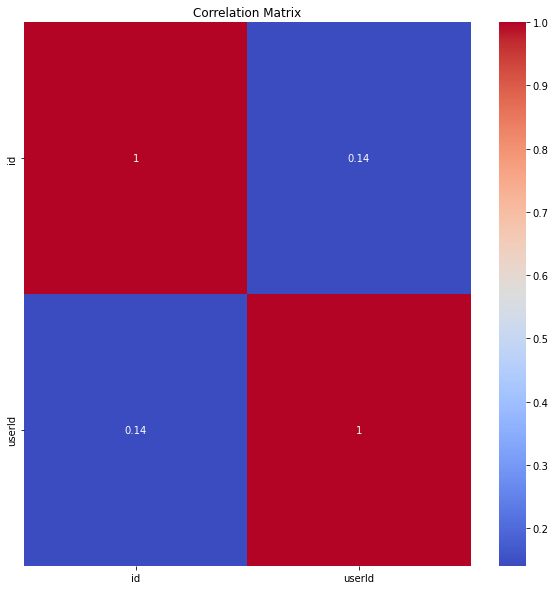

In [10]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

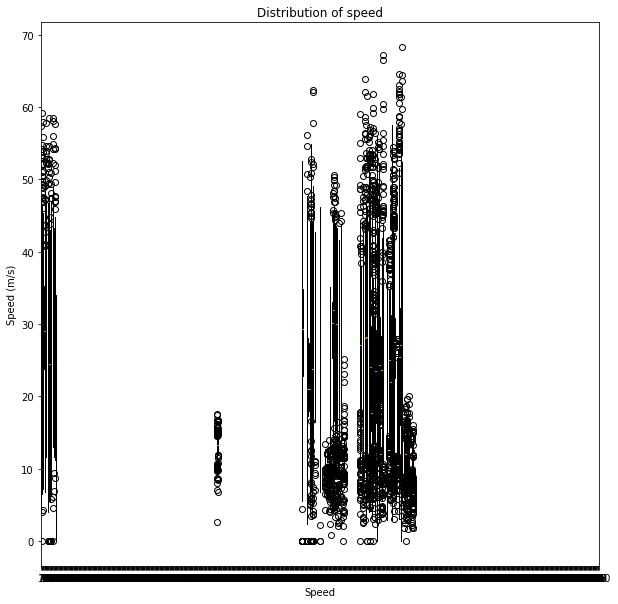

In [11]:
plt.boxplot(df['speed'])
plt.xlabel('Speed')
plt.ylabel('Speed (m/s)')
plt.title('Distribution of speed')
plt.show()

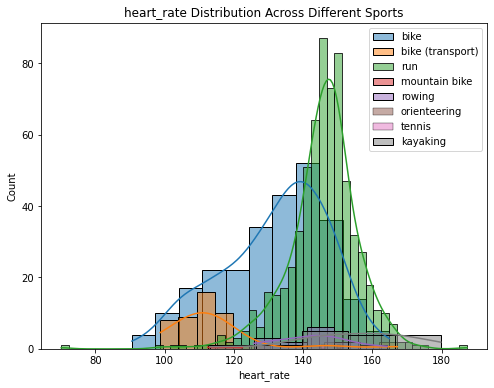

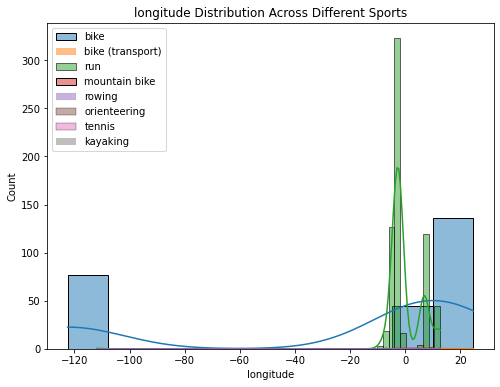

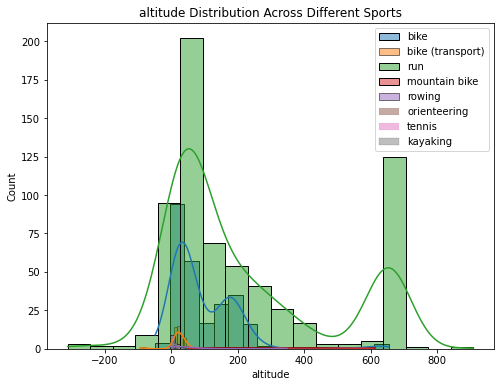

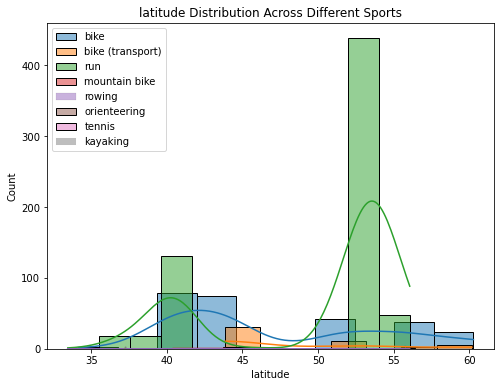

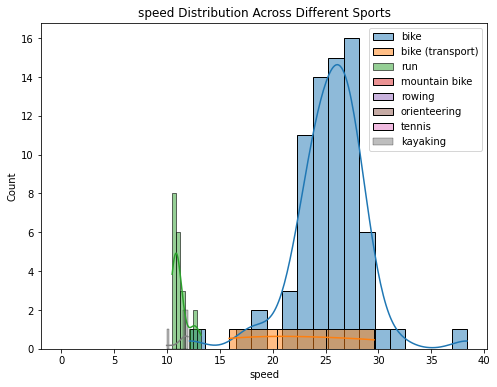

In [12]:
num_features = ['heart_rate', 'longitude', 'altitude', 'latitude', 'speed']

for feature in num_features:
    plt.figure(figsize=(8, 6))
    for i, sport in enumerate(df['sport'].unique()):
        sns.histplot(df[df['sport'] == sport][feature].apply(lambda x: np.mean(x)), kde=True, label=sport)
    plt.title(f'{feature} Distribution Across Different Sports')
    plt.legend()
    plt.show()

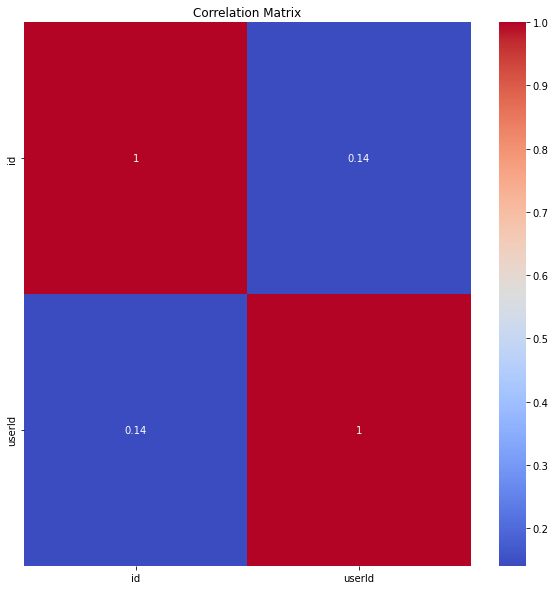

In [13]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
print(y_pred,y_test)

['bike' 'run' 'run' 'run' 'run' 'kayaking' 'bike' 'run' 'run' 'run' 'run'
 'run' 'bike' 'run' 'run' 'run' 'rowing' 'run' 'run' 'run' 'bike' 'bike'
 'run' 'bike' 'bike (transport)' 'bike' 'run' 'run' 'run' 'run' 'run'
 'run' 'bike' 'bike' 'run' 'bike' 'run' 'bike' 'run' 'run' 'run' 'run'
 'bike' 'run' 'bike' 'bike' 'run' 'bike' 'run' 'run' 'bike' 'run' 'bike'
 'bike' 'bike' 'run' 'bike' 'bike' 'bike' 'run' 'run' 'run' 'run'
 'bike (transport)' 'bike' 'run' 'run' 'run' 'run' 'run' 'run' 'bike'
 'bike' 'run' 'bike' 'bike' 'run' 'run' 'bike' 'bike' 'kayaking' 'run'
 'rowing' 'run' 'run' 'run' 'run' 'run' 'run' 'run' 'bike' 'run' 'run'
 'bike' 'run' 'run' 'run' 'run' 'run' 'run' 'run' 'run' 'run'
 'bike (transport)' 'bike' 'bike' 'bike' 'run' 'bike' 'run' 'run' 'run'
 'run' 'run' 'bike (transport)' 'run' 'bike' 'run' 'run' 'rowing' 'run'
 'run' 'run' 'bike' 'bike' 'run' 'bike' 'run' 'run' 'run' 'bike' 'run'
 'bike' 'run' 'bike' 'run' 'run' 'bike' 'bike' 'run' 'run' 'bike' 'run'
 'rowing' 'r

In [ ]:
# Time series analysis
for i, row in df.iterrows():
    plt.plot(row['timestamp'], row['heart_rate'], label=row['sport'])

plt.title('Heart Rate Time Series for Different Sports')
plt.legend()
plt.show()

In [58]:
# Feature relationships with Sport
plt.figure(figsize=(16, 8))
sns.boxplot(x='sport', y='heart_rate', data=df.explode('timestamp'), showfliers=False)  # Removing outliers for better visualization
plt.title('Heart Rate Distribution Across Different Sports')
plt.show()

ValueError: Could not interpret value `sport` for `x`. Value is a string, but `data` was not passed.

<Figure size 1152x576 with 0 Axes>

In [62]:
X = df.drop('sport', axis=1)
y = df['sport']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple predictive model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

ValueError: setting an array element with a sequence.

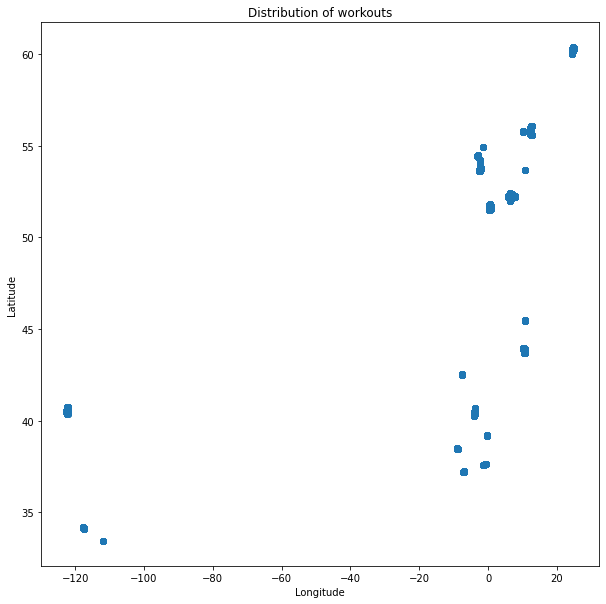

In [64]:
plt.scatter(df['longitude'].to_list(), df['latitude'].to_list())
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of workouts')
plt.show()